Computational modeling in Python, SoSe22 

# Expressing and visualizing symbolic functions on a numeric grid

Given are the following functions:

\begin{align}
    f_1(x) &= x\left(x-3\right)\left(x+3\right) \\
    f_2(x) &= \left| x \right| \\
    f_3(x) &= \sin \left(2.1x\right)\left(-\frac{x}{2}\right) \\
    f_4(x) &= 1.6^x -1.5x \\
    f_5(x,y) &= \sin\left(x+y\right)\tan\left(0.1x\right) \\
    f_6(x,y) &= \sin\left(\sqrt{5}+x\right)y \\
\end{align}

\- courtesy of Anna Bardroff \- 


# Task 1

Define numeric functions for $f_1$ to $f_6$ and plot the 1D functions $f_1$ to $f_4$ using labels, axes formatting etc. to make the plots look nice.

In [1]:
from numpy import *
import matplotlib.pyplot as plt

# a function with two arguments
def myfunc(x,y):
    z = x**2+y**2
    return z


# 3D plots and contour plots

We can generate surface plots and contour plots for 2D functions as below. If you need to plot more than one surface in the same surface plot, matplotlib will likely render it incorrectly - see
https://stackoverflow.com/questions/13932150/matplotlib-wrong-overlapping-when-plotting-two-3d-surfaces-on-the-same-axes  or https://matplotlib.org/stable/api/toolkits/mplot3d/faq.html - in this case, mayavi should be used for the plots.

In [2]:
# need additional modules
from matplotlib import cm  # color map

mf = 16

# the x and y values need to be spanned on a 2D mesh
xgrid = arange(-2,2.1,.2)
ygrid = arange(-2,2.1,.2)
X, Y = meshgrid(xgrid, ygrid)

print(X)
#print(Y)

[[-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
  -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
  -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
   4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
   1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00
   2.0000000e+00]
 [-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
  -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
  -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
   4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
   1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00
   2.0000000e+00]
 [-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
  -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
  -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
   4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
   1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00
   2.0000000e+00]
 [-2.0000000e+00

When we want to plot 2D functions $f(x,y)$ we typically set up a grid for all $x$-values and for all $y$-values, say, 10 points with indices $i$ and  $j$ for each variable. We then have to loop through all $10\times 10 = 100$ combinations of the different $x$- and $y$-values to evaluate the function at the respective $x$ and $y$ values. 

What <code>X, Y = meshgrid(xgrid, ygrid) </code> returns are all these combinations in two arrays such that we can access them as $x_i$=<code>X[j,i]</code> and $y_j$=<code>Y[j,i]</code>.  (See the help of <code>meshgrid()</code>, especially the <code>indexing</code> parameter for some subtleties about $i$ and  $j$ )

Since <code>X, Y</code> are 2D numpy arrays arithmetic operations are performed element wise. In <code>myfunc</code> the square and plus operation are hence performed on all elements of <code>X, Y</code> and the result is also an array holding the function values in the respective index <code>[j,i]</code>. So we can evaluate all elements with one single call to the function. This is possible because all array elements have the same data type. This is also referred to as <i>vectorization</i>.

In [3]:
# vectorized version from problem 1:
# this is actually much faster than
# explicit looping as in problem 1

def area_circ(r):
    a = pi * r**2
    c = 2.0 * pi * r
    return a, c  # tuple packing

r = linspace(0,10,11)

area, circ = area_circ(r) # tuple unpacking
print(area)
print(circ)

[  0.           3.14159265  12.56637061  28.27433388  50.26548246
  78.53981634 113.09733553 153.93804003 201.06192983 254.46900494
 314.15926536]
[ 0.          6.28318531 12.56637061 18.84955592 25.13274123 31.41592654
 37.69911184 43.98229715 50.26548246 56.54866776 62.83185307]


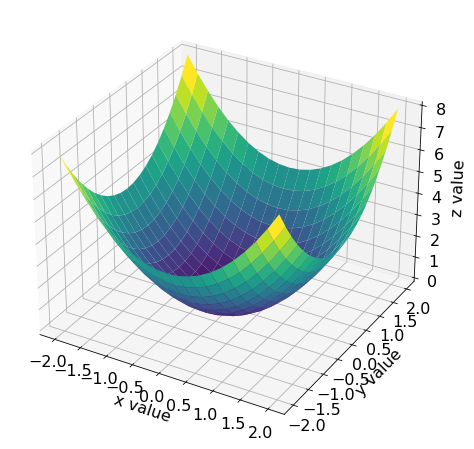

In [9]:
# call the function on the grid
f5 = myfunc(X,Y)
#print(f5)


fig = plt.figure(figsize=(10,8))

# This creates an axes object. Since we 
# we want to do a 3D plot we add the
# named argument "projection='3d'"
ax = plt.axes(projection='3d')

# cm: color map 
ax.plot_surface(X, Y, f5, cmap = cm.viridis, rstride=1, cstride=1, edgecolor='None')
#rstride = 1 - taking each element
#rstride = 2 - taking every second element

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)

# z axis fontsize is a bit cumbersome
for t in ax.zaxis.get_major_ticks(): 
    t.label.set_fontsize(mf)

ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
ax.set_zlabel('z value',fontsize=mf)

plt.show()

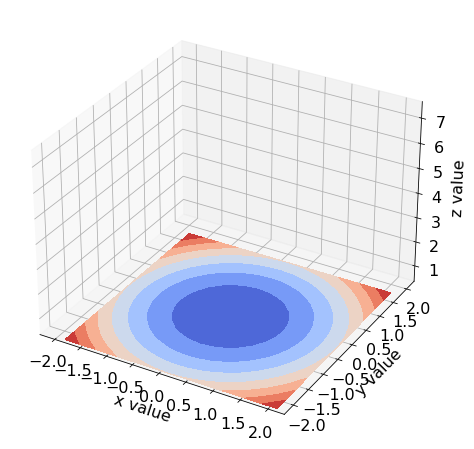

In [15]:
# or as a contour
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

# zdir='z' project onto x-y-plane at given offset
ax.contourf(X, Y, f5, zdir='z', offset=0, cmap=cm.coolwarm)
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)

for t in ax.zaxis.get_major_ticks(): 
    t.label.set_fontsize(mf)

ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
ax.set_zlabel('z value',fontsize=mf)
plt.show()

In [16]:
# both graphics can be combined
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, f5,cmap = cm.viridis,rstride=1, cstride=1,edgecolor='none')

# alpha gives the opacity of the visual object
# offset signifies at which z value to plot the contour
# zdir='z' project onto z-axis at given offset, try zdir='x' to see what it does

ax.contourf(X, Y, f5, zdir='z', offset=-0.5, cmap='Greys',alpha=0.7)
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)

for t in ax.zaxis.get_major_ticks(): 
    t.label.set_fontsize(mf)

ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
ax.set_zlabel('z value',fontsize=mf)

plt.show()

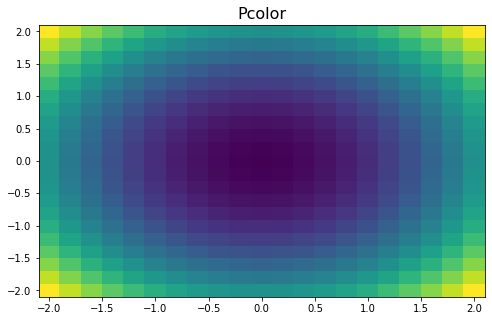

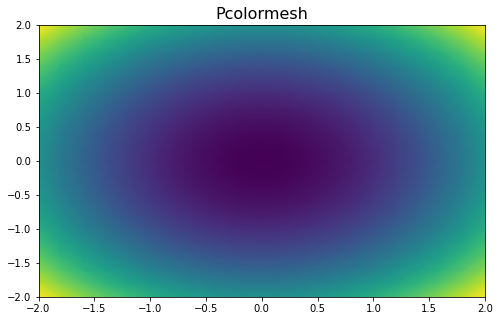

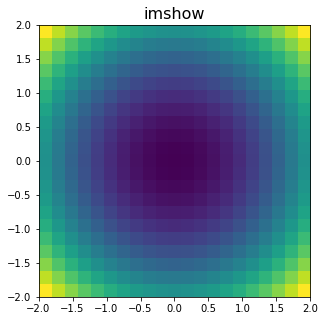

In [7]:
# or in a 2D heatmap


# pcolor
fig, ax = plt.subplots(figsize=(8,5))
# shading: how to calculate the colors 
# for instance on the data points 'nearest',
# calculate gradients (gouraud) etc.
ax.pcolor(X, Y, f5, cmap='viridis',shading='nearest')
ax.set_title('Pcolor',fontsize=mf)
plt.show()

# pcolormesh
fig, ax = plt.subplots(figsize=(8,5))
ax.pcolormesh(X, Y, f5, cmap='viridis',shading='gouraud')
ax.set_title('Pcolormesh',fontsize=mf)
plt.show()

# imshow 
fig, ax = plt.subplots(figsize=(8,5))
# no x- and y- values, it intepretes the array as a bitmap. 
# so we need to set the axis ranges manually
ax.imshow(f5,extent=[-2,2,-2,2])
ax.set_title('imshow',fontsize=mf)
plt.show()

__The difference between pcolor/pcolormesh/imshow:__

 - pcolor and pcolormesh are practically identical, with the only difference that pcolormesh is much faster as it is solely intended for this purpose
 - imshow is again faster than pcolormesh
 - imshow follows the image processing convention with the origin in the top left corner. This can be rotated as shown below.

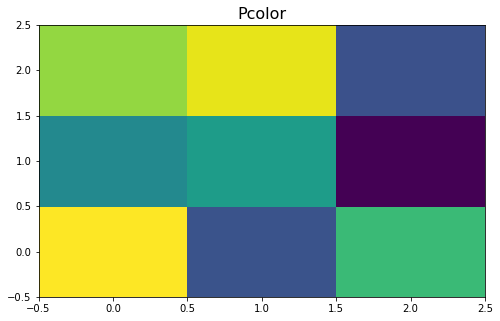

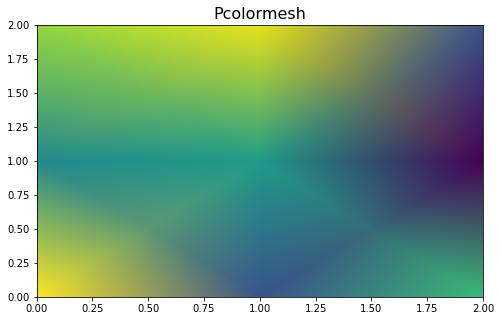

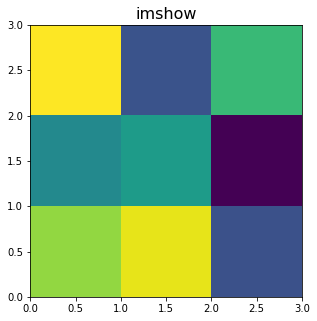

In [8]:
# to see the difference pcolor(mesh) of the shading keyword:
f5 = array([[ 1.0,  0.25576786,  0.67696279],
       [ 0.47049696,  0.54773236,  0.0 ],
       [ 0.83608481,  0.96395743,  0.24782517]])
X=array((0,1,2))
Y=array((0,1,2))

#pcolor
fig, ax = plt.subplots(figsize=(8,5))
# shading: how to calculate the colors 
# for instance on the data points 'nearest',
# calculate gradients (gouraud) etc.
ax.pcolor(X, Y, f5, cmap='viridis',shading='nearest')
ax.set_title('Pcolor',fontsize=mf)
plt.show()

#pcolormesh
fig, ax = plt.subplots(figsize=(8,5))
ax.pcolormesh(X, Y, f5, cmap='viridis',shading='gouraud')
ax.set_title('Pcolormesh',fontsize=mf)
plt.show()

#imshow 
fig, ax = plt.subplots(figsize=(8,5))
ax.imshow(f5,extent=[0,3,0,3])
ax.set_title('imshow',fontsize=mf)
plt.show()


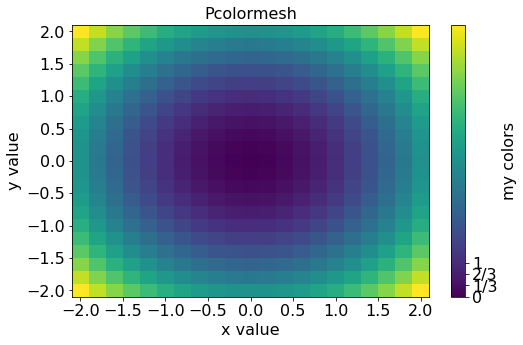

In [28]:
# pcolormesh with colorbar - works also for pcolor

fig, ax = plt.subplots(figsize=(8,5))

c = ax.pcolormesh(X, Y, f5, cmap='viridis',shading='auto')
cbar = plt.colorbar(c, ticks=[0, 1/3, 2/3, 1])
cbar.ax.set_yticklabels(['0','1/3','2/3','1'],fontsize=mf)
cbar.set_label('my colors', rotation=90,fontsize=mf)

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
ax.set_title('Pcolormesh',fontsize=mf)
plt.show()

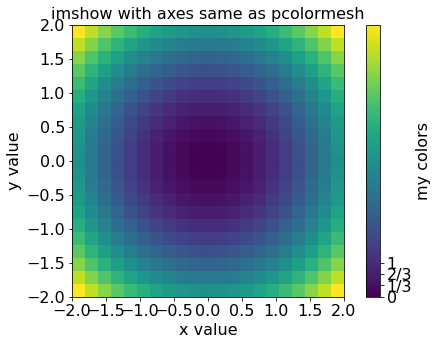

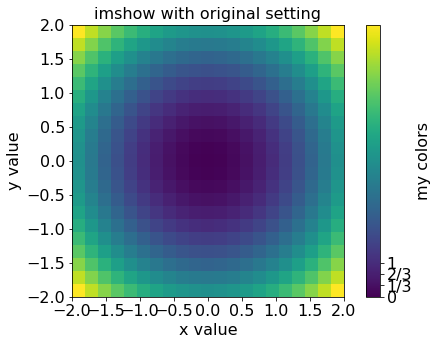

In [27]:
# imshow
fig, ax = plt.subplots(figsize=(8,5))
c = ax.imshow(f5,extent=[-2,2,-2,2],origin='lower')      # set the origin
cbar = plt.colorbar(c, ticks=[0, 1/3, 2/3, 1])
cbar.ax.set_yticklabels(['0','1/3','2/3','1'],fontsize=mf)
cbar.set_label('my colors', rotation=90,fontsize=mf)

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)

ax.set_title('imshow with axes same as pcolormesh',fontsize=mf)
plt.show()
#imshow
fig, ax = plt.subplots(figsize=(8,5))
c = ax.imshow(f5,extent=[-2,2,-2,2])
cbar = plt.colorbar(c,ticks=[0, 1/3, 2/3, 1])
cbar.ax.set_yticklabels(['0','1/3','2/3','1'],fontsize=mf)
cbar.set_label('my colors', rotation=90,fontsize=mf)

plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)

ax.set_title('imshow with original setting',fontsize=mf)
plt.show()

# Task 2

Plot $f_5$ and $f_6$ using surface plots and contour plots.

# Making a Movie

Matplotlib has a very nice animator feature that lets you visualize time-dependent data as a movie. The animator function <code>FuncAnimation</code> needs as input a matplotlib figure object and an update function that returns things to plot for each frame. In this case it is a matplotlib line object. 

To save a movie in .mp4 format we need to install an additional package with conda: Open the command promt (Windows users: use the Anaconda navigator to open powershell) and activate your conda environment: <pre>conda activate</pre> 
and install 'ffmpeg'
<pre>conda install ffmpeg</pre> 


In [32]:
from matplotlib.animation import FuncAnimation
from numpy.random import random
from IPython.display import HTML 

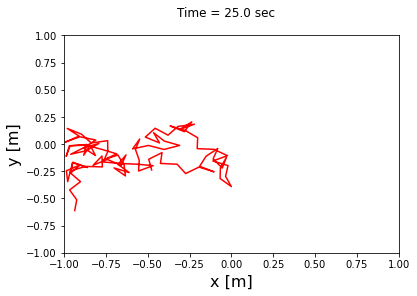

In [34]:
mf = 16 # font size

# create an empty figure object and add a subplot
fig = plt.figure() # smaller is faster
ax = fig.add_subplot()

# set some boundaries
xmin = -1
xmax = 1
ymin = -1
ymax = 1

# start with no data as we will generate it later
xdata, ydata = [], []

# create an empty line object 
# we just update the x and y data of the line
# and do not create the line from scratch in each frame
line, = ax.plot(xdata, ydata, 'r-')


# this function is called ones in the begining
# it can be used to set a number of things for the frames.
# each frame is just a regular plot from matplotlib,
# the plots are then put together into a movie
def initFrame():
    # axis
    ax.set_xlabel(r'x [m]', fontsize=mf)
    ax.set_ylabel(r'y [m]', fontsize=mf)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    
    return line, # return a sequence (extra komma) 
    
    

# we need a function that calculates the next frame
# it gets as argument the frame number and any number of 
# additional arguments one needs. See call to FuncAnimation
def updateFrame(nframe,xdata,ydata):
    
    
    if nframe == 0:
        # in the first frame we just set the first point in the middle
        xdata.append((xmin+xmax)/2) # start in the middle of the plot
        ydata.append((ymin+ymax)/2)
        line.set_data(xdata, ydata)
        return line, # need to be a sequence, here tuple
    
    
    deltaT = 0.1 # 100 ms
    deltaR = 0.1 
    
    # we may want to give the current time in the title
    itime = nframe*deltaT 
    plt.suptitle("Time = " + '{:4.1f}'.format(itime)+' sec')
        
    # we just do a random walk and plot the trajectory of
    # the walker. The step width is deltaT and the 
    # direction is random 
    
    phi = random()*pi*2 # random number in [0,2PI)
    
    dx = cos(phi)*deltaR
    dy = sin(phi)*deltaR
    
    newx = xdata[-1] + dx
    newy = ydata[-1] + dy
 
    # bounce on walls of figure:
    if newx > xmax or newx < xmin: newx -= 2*dx
    if newy > ymax or newy < ymin: newy -= 2*dy 
    
    # append new data to end of list
    xdata.append(newx)
    ydata.append(newy)
    
    # delete data on the tail 
    if len(xdata) > 100:
        xdata.pop(0) # removes zero'th element
        ydata.pop(0)
        
    line.set_data(xdata, ydata)
    return line,  # return a sequence (extra comma) 
    
   
# note: we can use line breaks in function calls
animation = FuncAnimation(fig, init_func=initFrame, frames=251, 
                        interval=100, repeat=False,blit=True,
                        func=updateFrame, fargs=tuple([xdata,ydata]))  
# ------------------------------------------------------^ additional arguments of updateFrame

# blit: fast graphics operations: only re-draw changed parts of the frame 

# we can save to file
# (this will take a a few seconds to render)
#animation.save('random_walker.mp4', fps=10, dpi=150, writer='ffmpeg')

# or embed the animation into the notebook
# (this will take a a few seconds to render)
#HTML(animation.to_html5_video())

# and even add control elements using Javascript widgets 
# (this will take a a few seconds to render)
HTML(animation.to_jshtml())

# Task 3

Animate the function $f(x,t) = \cos(x+\omega t)$ for $\omega = 1$ in the intervals $x,t \in [0,2\pi]$. 